## 資料型態介紹

1. Panda基本介紹
    
    Pandas是一個基於Numpy的package，普遍用於數據操作
    有兩種特殊的資料型態dataframe和serises的差別

    > serises是一個一維的資料結構；dataframe則是二維的，像是表格的存在
    > 不同的數據處理函式，會需要不同的數據類型    

2. 基本數據類型介紹
    
    數值型態：
    > int：整數 integer，ex:1, 34, 50....，這次資料的All_Reaction_Count、LIKE_COUNT
    > float：浮點數 floating-point，含有小數點的,ex:1.4, 3.14
    > bool：布林值 boolean，判斷是或否，只會有兩種 TRUE/FALSE，另外索引後回傳的結果也是
    
    字串型態：
    > str：字串 string，用''或""包起來的文字資料，ex:"台灣基進"、"台灣民進黨"...或像是這次的Page_Name、Message
    > chr：字元 character，組成字串的元素，ex:"台"、"灣"...
    
    時間型態
    > timestamp：存時間的格式，像是這次的Date，雖然看起來是時間的格式，但會被電腦認為是str，需要後續轉換
    
    容器型態
    > list：

In [1]:
import pandas as pd
csv_file = "10802_2020.csv"
df = pd.read_csv(csv_file)

df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
0,2020/01/11 20:07:46,台灣基進,348571125292077,NaN,photo,80928,74991,98,3847,1925,34,33,5732,4092,選舉過後，台灣基進不會停歇。\n \n縱使韓國瑜沒有當選，他仍然在高雄破壞著我們的城市，仍會...,NaN,NaN,1578744466000


這邊先拿Date欄位，當作series和dataframe比較的例子，
另外我們可以發現Date裡面雖然儲存的是日期，但卻是「字串」的形式。
所以後續在處理的時候，必須要再經過轉換才行。

In [2]:
#series和dataframe
ser_a = df['Date']
type(ser_a)

df_a = pd.DataFrame(df['Date'])
type(df_a)

#看一下各自的資料型態
#ser_a 
#df_a

#Date原本的資料型太
#ser_a
ser_a[0] #拿出index第0個的值

#從str轉換到Timestamp
type(ser_a[0])

ser_a = pd.to_datetime(ser_a)
type(ser_a[0])

pandas._libs.tslibs.timestamps.Timestamp

## 資料分析環節

In [3]:
import pandas as pd #讀取資料處理套件
df = pd.read_csv("10802_2020.csv") #讀取csv，資料存在df這個變數裡面

In [4]:
df.tail() #顯示 df中前5個row

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
3801,2019/12/02 12:07:46,台灣基進,348571125292077,NaN,video,1,1,0,0,0,0,0,0,0,我是一個修船技術員，與台灣基進戰鬥，是我愛台灣的方式。\n \n身為一個工仔kang-á（工...,【我也支持】我是工人，我挺台灣基進,NaN,1575259666000
3802,2019/09/11 19:45:08,台灣民眾黨,104699394209550,NaN,video,0,0,0,0,0,0,0,0,0,【民眾黨黨徽複評直播中！ #Live】\n台灣民眾黨視覺識別徵選複評於今日8點正式開始，5件...,民眾黨黨徽複評直播,NaN,1568202308000
3803,2020/01/10 13:14:03,台灣基進,348571125292077,NaN,photo,0,0,0,0,0,0,0,0,0,返鄉搭車的時候看一下基進的政策啦\n詳細懶人包在留言處\n給我看喔👊👊👊,台灣基進,🍀『基進』，是讓希望成為可能🍀\n \n沒有 #國家安全，公平正義與經濟民生等進步課題...,1578633243000
3804,2019/04/10 22:32:53,基進黨（基進側翼）,348571125292077,NaN,video,1,0,0,1,0,0,0,0,0,「台灣，已在準戰爭狀態中！」\n「我們，該怎麼辦？」\n \n近期，沈柏洋老師演講的逐字稿...,【再見了！中國】專訪沈柏洋(Puma)：台灣已經準戰爭狀態？（精華版）,NaN,1554906773000
3805,2019/12/06 16:00:01,中國國民黨 KMT,131181017972,NaN,video,0,0,0,0,0,0,0,0,0,【空汙越來越嚴重，難道要用愛發電嗎？】\n\n「以核養綠」與「反燃煤電廠」公投雙雙過關，蔡英...,空汙越來越嚴重，難道要用愛發電嗎？,NaN,1575619201000


In [5]:
#看一下df這個資料裡面的'Page_Name'欄位有幾個粉專名稱(政黨)
dff = set(df['Page_Name'])
dff

{'中國國民黨 KMT', '台灣基進', '台灣民眾黨', '基進黨（基進側翼）', '時代力量 New Power Party', '民主進步黨'}

In [6]:
#找出各政黨按讚數超過1000的文章各有幾篇
#[]是索引的方式
party = df[(df['LIKE_COUNT'] > 1000)].groupby("Page_Name")
party.size() #顯示出party的結果

Page_Name
中國國民黨 KMT               307
台灣基進                    880
台灣民眾黨                   359
基進黨（基進側翼）                50
時代力量 New Power Party    302
民主進步黨                   787
dtype: int64

In [7]:
#把每個政黨每篇文章的按讚數相加
#變數      依據政黨粉專名稱分類   取按讚數       相加
p1 = party.get_group("台灣基進")['LIKE_COUNT'].agg('sum')
p2 = party.get_group("民主進步黨")['LIKE_COUNT'].agg('sum')
p3 = party.get_group("中國國民黨 KMT")['LIKE_COUNT'].agg('sum')
p4 = party.get_group("台灣民眾黨")['LIKE_COUNT'].agg('sum')
p5 = party.get_group("時代力量 New Power Party")['LIKE_COUNT'].agg('sum')

In [8]:
#把每個政黨的按讚總數，存成一個資料集dictionary

data = {'Name':['台灣基進', '民主進步黨', '中國國民黨 KMT', '台灣民眾黨', '時代力量 New Power Party'],
        'LIKE':[p1, p2, p3, p4, p5]}
data

{'Name': ['台灣基進', '民主進步黨', '中國國民黨 KMT', '台灣民眾黨', '時代力量 New Power Party'],
 'LIKE': [4393872, 3397500, 949674, 870808, 840840]}

In [9]:
df.sort_values(by=['LOVE_COUNT'], inplace=True)

In [10]:
#把剛剛存好的政黨讚數data，轉成dataframe，叫做likedata
likedata = pd.DataFrame(data)
likedata

,Name,LIKE
0,台灣基進,4393872
1,民主進步黨,3397500
2,中國國民黨 KMT,949674
3,台灣民眾黨,870808
4,時代力量 New Power Party,840840


In [11]:
import matplotlib.pyplot as plt #載入要畫畫的套件，之後使用的時候呼叫plt就可以了

#設定中文字形
plt.rcParams['font.sans-serif']=['SimHei'] 
#剛剛的likedata，可以利用plot.bar畫圖，設定xy軸的值各是likedata的name和LIKE
likedata.plot.bar(x='Name', y='LIKE') 

In [12]:
print(df.shape)  #這個 DataFrame 有幾列有幾欄
print(df.index)  #這個 DataFrame 的列索引資訊
print(df.describe()) #對所有資料做基本統計
print(df['Page_Name'].unique()) #對看單個欄位的值有哪些
print ("each column has NaN\n", df.isnull().sum(),"\n") #計算空值

(3806, 18)
Int64Index([1902, 3719, 3709, 3707, 3703, 3698, 3692, 3644, 3615, 3603,
            ...
               6,   16,   38,   17,    8,   14,    2,    0,   10,    3],
           dtype='int64', length=3806)
            Page_ID  Link  All_Reaction_Count    LIKE_COUNT    WOW_COUNT  \
count  3.806000e+03   0.0         3806.000000   3806.000000  3806.000000   
mean   2.596224e+14   NaN         3327.254335   2938.954808    21.915134   
std    3.040331e+14   NaN         4308.677732   3827.583854    71.346803   
min    1.311810e+11   NaN            0.000000      0.000000     0.000000   
25%    1.503364e+11   NaN          961.500000    871.000000     1.000000   
50%    1.046994e+14   NaN         1946.000000   1760.000000     4.000000   
75%    3.485711e+14   NaN         4236.750000   3666.250000    15.000000   
max    8.910842e+14   NaN        80928.000000  74991.000000  1647.000000   

        LOVE_COUNT   HAHA_COUNT    SAD_COUNT   ANGRY_COUNT  Comment_Count  \
count  3806.000000  3806.00

## ==================================================================

## 切割並新增欄位
Date -> Year

In [13]:
#print(df['Date'])
print(df['Date'][0].split("/"))

['2020', '01', '11 20:07:46']


In [14]:
df['Year'] = df['Date'].apply(lambda x : x.split("/")[0])

## Your turn!

Date -> Month / Hour

In [15]:
likedata = pd.DataFrame(data)
likedata

,Name,LIKE
0,台灣基進,4393872
1,民主進步黨,3397500
2,中國國民黨 KMT,949674
3,台灣民眾黨,870808
4,時代力量 New Power Party,840840


## 找出comment數最多的文章內容

In [16]:
import pandas as pd
df = pd.read_csv("10802_2020.csv")
#min(),mean()
print(max(df.Comment_Count)) 
print(df[ (df['Comment_Count'] == max(df.Comment_Count) ) ])

28413
                  Date Page_Name       Page_ID  Link   Type  \
3  2020/01/11 16:52:23     民主進步黨  150336441057   NaN  video   

   All_Reaction_Count  LIKE_COUNT  WOW_COUNT  LOVE_COUNT  HAHA_COUNT  \
3               54703       45865         68        8065         464   

   SAD_COUNT  ANGRY_COUNT  Comment_Count  Share_Count  \
3         45          196          28413         2212   

                      Message                             Link_Title  \
3  《2020 台灣要贏 LET'S WIN 開票之夜》  2020.01.11 《2020 台灣要贏 LET'S WIN 開票之夜》   

  Link Description   created_time  
3              NaN  1578732743000  


### 觀察：
我們發現留言數最多的文章是民進黨的《2020 台灣要贏 LET'S WIN 開票之夜》，可以試著從分析各個政黨在2020.01.11的LIKE_COUNT來算出其與得票數的相關程度

## Your turn!
找出 All_Reaction_Count數最少的文章內容



In [17]:
print(df[ (df['All_Reaction_Count'] == min(df.All_Reaction_Count) ) ]['Message'])

3802    【民眾黨黨徽複評直播中！ #Live】\n台灣民眾黨視覺識別徵選複評於今日8點正式開始，5件...
3803                 返鄉搭車的時候看一下基進的政策啦\n詳細懶人包在留言處\n給我看喔👊👊👊
3805    【空汙越來越嚴重，難道要用愛發電嗎？】\n\n「以核養綠」與「反燃煤電廠」公投雙雙過關，蔡英...
Name: Message, dtype: object


## 取各個政黨 like > 1000 的文章數


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['SimHei']})

#count() 的用法是計算個數
#試試看sum(),mean(),median()...

likedf = df[(df['LIKE_COUNT'] > 1000)].groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')


likedf = df[(df['LIKE_COUNT'] > 1000)].groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')
likedf = likedf.rename(columns={'All_Reaction_Count': '文章數'})
print(likedf)
print(likedf.columns.values)

              Page_Name  Date  Page_ID  Link  Type  文章數  LIKE_COUNT  \
3             基進黨（基進側翼）    50       50     0    50   50          50   
4  時代力量 New Power Party   302      302     0   302  302         302   
0             中國國民黨 KMT   307      307     0   307  307         307   
2                 台灣民眾黨   359      359     0   359  359         359   
5                 民主進步黨   787      787     0   787  787         787   
1                  台灣基進   880      880     0   880  880         880   

   WOW_COUNT  LOVE_COUNT  HAHA_COUNT  SAD_COUNT  ANGRY_COUNT  Comment_Count  \
3         50          50          50         50           50             50   
4        302         302         302        302          302            302   
0        307         307         307        307          307            307   
2        359         359         359        359          359            359   
5        787         787         787        787          787            787   
1        880         880    

## 畫成Bar Chart

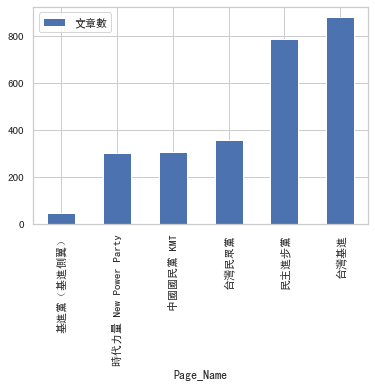

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

likedf.plot.bar(x='Page_Name', y='文章數')

### 觀察：
依照 like>1000的文章數 大小排序，我們發現台灣基進、民主進步黨的文章數遠大於其他政黨，可能是支持者年輕人比例較高

## Your turn!

取出民進黨和國民黨文章中留言數>500的總讚數，並且畫成bar chart 

   Page_Name         Page_ID  Link  All_Reaction_Count      總讚數  WOW_COUNT  \
0  中國國民黨 KMT  36861866050132   0.0             1047292   846985       7597   
1      民主進步黨  28413587359773   0.0             1604607  1451307       5228   

   LOVE_COUNT  HAHA_COUNT  SAD_COUNT  ANGRY_COUNT  Comment_Count  Share_Count  \
0       23097       64586       7511        97516         488870        79127   
1       77311       19936       9337        41479         344118        64828   

      created_time  
0  441142294999000  
1  296746417617000  
['Page_Name' 'Page_ID' 'Link' 'All_Reaction_Count' '總讚數' 'WOW_COUNT'
 'LOVE_COUNT' 'HAHA_COUNT' 'SAD_COUNT' 'ANGRY_COUNT' 'Comment_Count'
 'Share_Count' 'created_time']


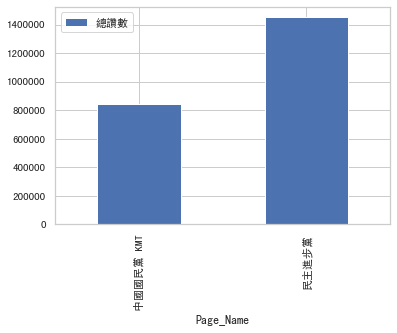

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['SimHei']})

#count() 的用法是計算個數
#試試看sum()
likedf = df[((df['Page_Name'] == '民主進步黨') | (df['Page_Name'] == '中國國民黨 KMT')) & (df['Comment_Count'] > 500)].groupby(by ='Page_Name').sum().reset_index().sort_values('All_Reaction_Count')
likedf = likedf.rename(columns={'LIKE_COUNT': '總讚數'})
print(likedf)
print(likedf.columns.values)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']       
likedf.plot.bar(x='Page_Name', y='總讚數')

## 台灣民眾黨發布文章type的比例


In [21]:
import pandas as pd
df = pd.read_csv("10802_2020.csv")
df.head()
likedf =  df.groupby(['Page_Name','Type']).count().reset_index()
likedf =  likedf[likedf['Page_Name'] == '台灣民眾黨']
likedf['Page_ID'] = likedf['Page_ID'].apply(lambda x :x/likedf['Page_ID'].sum())
print(likedf['Page_ID'])

8     0.003759
9     0.500000
10    0.071429
11    0.424812
Name: Page_ID, dtype: float64


## 畫成 pie chart

([<matplotlib.patches.Wedge at 0x276692dea08>,
 [Text(1.0999232825541922, 0.012991246868981803, 'link'),
  Text(-0.025980681637458668, 1.0996931409177986, 'photo'),
  Text(-1.0663402896640426, -0.2700340471851762, 'status'),
  Text(0.25742146943211297, -1.0694550888538574, 'video')],
 [Text(0.5999581541204684, 0.007086134655808255, '0.4%'),
  Text(-0.014171280893159272, 0.5998326223187992, '50.0%'),
  Text(-0.5816401579985686, -0.14729129846464156, '7.1%'),
  Text(0.14041171059933433, -0.5833391393748312, '42.5%')])

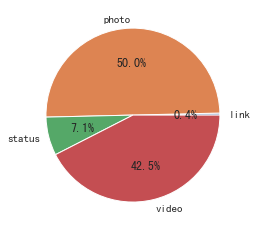

In [22]:
plt.pie(likedf['Page_ID'] , labels = likedf['Type'],autopct='%1.1f%%')

### 觀察：
我們發現台灣民眾黨的文章比例以photo、video為主，可以推測fb網友會較願意看這2種type的文章。

## Your turn!

取出各政黨的總發文數，並且畫成pie chart 

              Page_Name  Date  Page_ID  Link  Type   文章數  LIKE_COUNT  \
3             基進黨（基進側翼）   171      171     0   171   171         171   
0             中國國民黨 KMT   492      492     0   492   492         492   
2                 台灣民眾黨   532      532     0   532   532         532   
4  時代力量 New Power Party   574      574     0   574   574         574   
5                 民主進步黨  1001     1001     0  1001  1001        1001   
1                  台灣基進  1036     1036     0  1036  1036        1036   

   WOW_COUNT  LOVE_COUNT  HAHA_COUNT  SAD_COUNT  ANGRY_COUNT  Comment_Count  \
3        171         171         171        171          171            171   
0        492         492         492        492          492            492   
2        532         532         532        532          532            532   
4        574         574         574        574          574            574   
5       1001        1001        1001       1001         1001           1001   
1       1036        1

([<matplotlib.patches.Wedge at 0x27669303a08>,
 [Text(1.0890605379989489, 0.15474864966596724, '基進黨（基進側翼）'),
  Text(0.8494828833265421, 0.6988410627139942, '中國國民黨 KMT'),
  Text(0.040849474024167214, 1.099241247621262, '台灣民眾黨'),
  Text(-0.8448496349845893, 0.704435301689521, '時代力量 New Power Party'),
  Text(-0.9047264009172854, -0.6256757462801763, '民主進步黨'),
  Text(0.7217182740845872, -0.8301341655734721, '台灣基進')],
 [Text(0.5940330207266993, 0.08440835436325485, '4.5%'),
  Text(0.4633542999962956, 0.38118603420763314, '12.9%'),
  Text(0.022281531285909387, 0.5995861350661429, '14.0%'),
  Text(-0.4608270736279578, 0.3842374372851932, '15.1%'),
  Text(-0.4934871277730647, -0.34127767978918705, '26.3%'),
  Text(0.39366451313704753, -0.4528004539491665, '27.2%')])

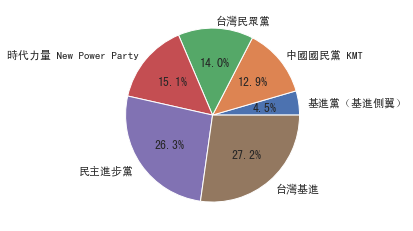

In [23]:
likedf = df.groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')
likedf = likedf.rename(columns={'All_Reaction_Count': '文章數'})
print(likedf)
plt.pie(likedf['文章數'] , labels = likedf['Page_Name'],autopct='%1.1f%%')

### 觀察：
台灣基進、民主進步黨的發文比例偏高，可以觀察出這2黨相較於其他黨而言，將FB作為主要累積聲量的工具，觸及率可能也較高。

# 畫出各政黨每個月的發文趨勢

In [24]:
import pandas as pd
csv_file = "10802_2020.csv"
df = pd.read_csv(csv_file)

df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
0,2020/01/11 20:07:46,台灣基進,348571125292077,NaN,photo,80928,74991,98,3847,1925,34,33,5732,4092,選舉過後，台灣基進不會停歇。\n \n縱使韓國瑜沒有當選，他仍然在高雄破壞著我們的城市，仍會...,NaN,NaN,1578744466000


首先我們把日期取出來，存到另外一個欄位Post_Date和Post_Year
注意：這裡是因為Date還是str的型態才可以這樣切，如果之後轉成datetime就會出現錯誤。

In [25]:
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() 
#df.head(1)

df["Hour"] = df["Date"].str.split(" ").str.get(1).str.title().str.split(":").str.get(0)
df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,Post_Date,Hour
0,2020/01/11 20:07:46,台灣基進,348571125292077,NaN,photo,80928,74991,98,3847,1925,34,33,5732,4092,選舉過後，台灣基進不會停歇。\n \n縱使韓國瑜沒有當選，他仍然在高雄破壞著我們的城市，仍會...,NaN,NaN,1578744466000,2020/01/11,20


In [26]:
#格式化時間
df['Date'] = pd.to_datetime(df['Date'])
df['Post_Date'] = pd.to_datetime(df['Post_Date'])

df['Week'] = df['Date'].dt.strftime('%A')
df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,...,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,Post_Date,Hour,Week
0,2020-01-11 20:07:46,台灣基進,348571125292077,NaN,photo,80928,74991,98,3847,1925,...,33,5732,4092,選舉過後，台灣基進不會停歇。\n \n縱使韓國瑜沒有當選，他仍然在高雄破壞著我們的城市，仍會...,NaN,NaN,1578744466000,2020-01-11,20,Saturday


## 折線圖
依據日期計算各政黨每個月的貼文成效
包括讚數、心情、留言等
p.s.注意有些欄位數字級距相差太大，放在同一張圖表會不好比較(ex:LIKE_COUNT、WOW_COUNT)

### 單個政黨貼文成效比較
每天民進黨獲得多少讚?

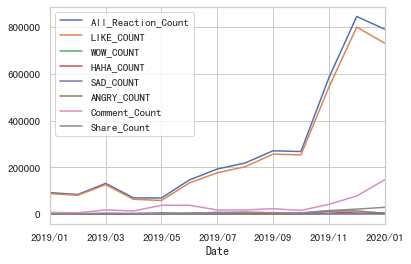

In [27]:
#篩選各政黨的資料
df_green = df[(df["Page_Name"] == "民主進步黨" )]
df_green
#一次抓很多筆
like_green = df_green.groupby(df['Date'].dt.strftime('%Y/%m'))['All_Reaction_Count','LIKE_COUNT','WOW_COUNT','HAHA_COUNT','SAD_COUNT','ANGRY_COUNT','Comment_Count','Share_Count'].sum().reset_index()
like_green

#比較按讚數和留言數的數量
like_green.plot(x='Date',y=['All_Reaction_Count','LIKE_COUNT','WOW_COUNT','HAHA_COUNT','SAD_COUNT','ANGRY_COUNT','Comment_Count','Share_Count'])

#### 畫法二：套件matplotlib

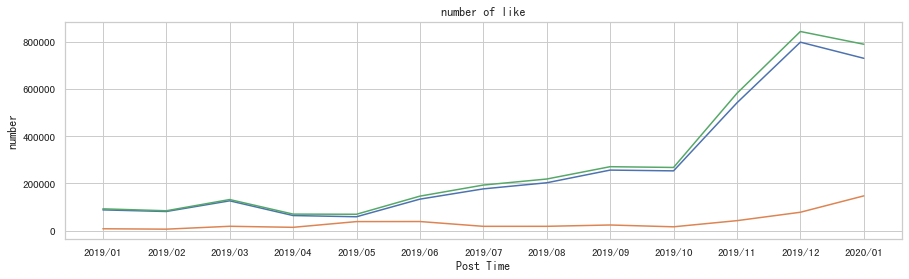

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4)) #設定圖表大小

plt.title("number of like") # 加標題
plt.xlabel("Post Time")     # 加x軸標題
plt.ylabel("number")        # 加y軸標題   

#可以用疊加的方式，把想要的變數畫上去
plt.plot(like_green['Date'],like_green['LIKE_COUNT'])
plt.plot(like_green['Date'],like_green['Comment_Count'])
plt.plot(like_green['Date'],like_green['All_Reaction_Count'])

## Your turn！
。請問基進黨的按讚數和留言數有相似的趨勢嗎？

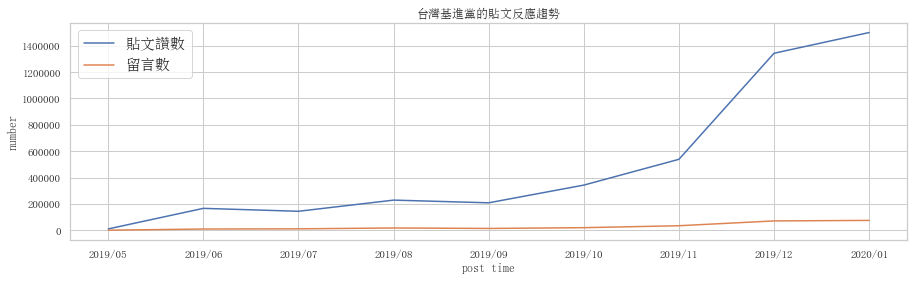

In [29]:
df_gi = df[(df["Page_Name"] == "台灣基進" )]
like_gi = df_gi.groupby(df['Date'].dt.strftime('%Y/%m'))['All_Reaction_Count','LIKE_COUNT','WOW_COUNT','HAHA_COUNT','SAD_COUNT','ANGRY_COUNT','Comment_Count','Share_Count'].sum().reset_index()

plt.figure(figsize=(15,4)) #設定圖表大小

plt.rcParams['font.sans-serif']=['simsun']
plt.title("台灣基進黨的貼文反應趨勢") # 加標題
plt.xlabel("post time")     # 加x軸標題
plt.ylabel("number")        # 加y軸標題   

#可以用疊加的方式，把想要的變數畫上去
plt.plot(like_gi['Date'],like_gi['LIKE_COUNT'],label='貼文讚數')
plt.plot(like_gi['Date'],like_gi['Comment_Count'],label='留言數')

#加標籤
plt.legend(loc = "best", fontsize=15)

In [30]:
#找出各政黨按讚數超過1000的文章各有幾篇
party_gi = df_gi[(df_gi['LIKE_COUNT'] > 30000)]
party_gi = pd.DataFrame(party_gi)
print(party_gi['Message'])

0    選舉過後，台灣基進不會停歇。\n　\n縱使韓國瑜沒有當選，他仍然在高雄破壞著我們的城市，仍會...
1                                        謝謝吳念真支持陳柏惟❤️！
2    【 3Q 陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，...
4    從台灣基進創立以來，高雄一直是我們最溫暖的家鄉。\n　\n一路走來，我們從一個小木箱一隻麥克...
6    首先，感謝每一張堅定投給台灣基進的政黨票。\n\n感謝每一位支持柏惟的選民。\n\n感謝因為...
7    這張圖，我們一個月前就做好了，就是在等這一刻。\n我們要跟市民說，市長要回來了，但我們也準備...
8    🎉狂賀 #反滲透法三讀通過 🎉\n這是迎接新年的最美好大禮！\n中國國民黨 KMT 、 新黨...
Name: Message, dtype: object


## 觀察
> 由以上貼文趨勢來看，讚數和留言回應數沒有明顯的正向關係，但總體上有隨貼文讚數上升的趨勢。
> 將讚數較多的貼文篩選出來看，發現在讚數最高的貼文中，除了選舉過後的謝票文讚數最高之外，
> 基進黨主打監督韓國瑜、與反滲透法的宣傳策略，也能引起廣大選民共鳴。

### 每天國民黨發出多少文?
在這邊我們用groupby的方式，把每個政黨一天會發幾篇文算出來
再用matplotlib畫出來比較

In [31]:
#把每個政黨每天發幾篇文算一次
df_post = df.groupby(['Page_Name','Post_Date'])['LIKE_COUNT'].count().reset_index(name='count')
#df_post

#把國民黨單獨拿出來
df_blue = df_post[df_post['Page_Name']=='中國國民黨 KMT']
df_blue

,Page_Name,Post_Date,count
0,中國國民黨 KMT,2019-01-01,2
1,中國國民黨 KMT,2019-01-02,1
2,中國國民黨 KMT,2019-01-03,1
3,中國國民黨 KMT,2019-01-04,1
4,中國國民黨 KMT,2019-01-09,2
...,...,...,...
298,中國國民黨 KMT,2020-01-17,1
299,中國國民黨 KMT,2020-01-20,1
300,中國國民黨 KMT,2020-01-22,2
301,中國國民黨 KMT,2020-01-24,1


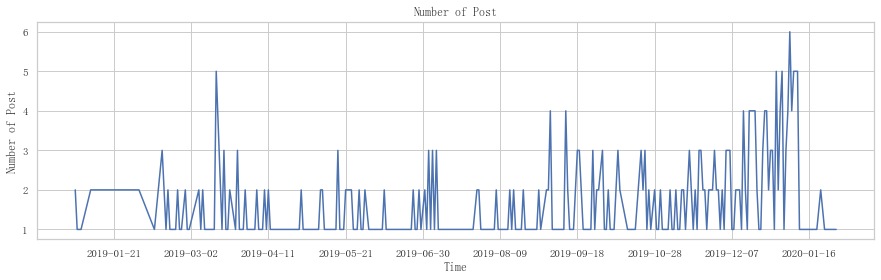

In [32]:
import matplotlib.ticker as ticker

plt.figure(figsize=(15,4)) #設定圖表大小

plt.title("Number of Post") # 加標題
plt.xlabel("Time")          # 加x軸標題
plt.ylabel("Number of Post")        # 加y軸標題   

plt.plot(df_blue['Post_Date'],df_blue['count'])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(40)) #調整x軸要顯示幾個值
plt.show()

## Your turn！
。請畫出民進黨每天的發文折線圖

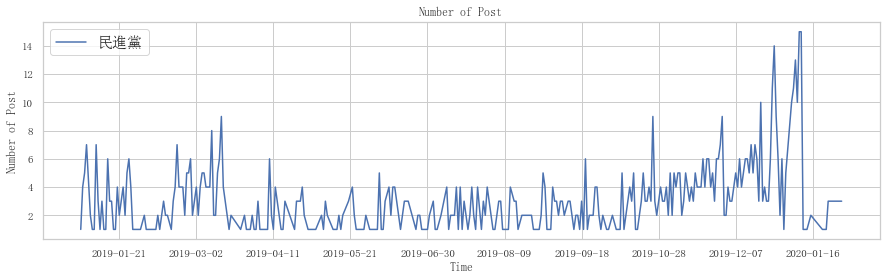

In [33]:
df_green = df_post[df_post['Page_Name']=='民主進步黨']

plt.figure(figsize=(15,4)) #設定圖表大小

plt.title("Number of Post") # 加標題
plt.xlabel("Time")          # 加x軸標題
plt.ylabel("Number of Post")        # 加y軸標題   

#plt.plot(df_blue['Post_Date'],df_blue['count'],label="國民黨")
plt.plot(df_green['Post_Date'],df_green['count'],label="民進黨")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(40)) #調整x軸要顯示幾個值

plt.legend(loc = "best", fontsize=15)
#plt.show()

## 觀察
從民進黨和國民黨的比較發現，民進黨在發文頻率上確實較高，推測在選戰策略上，網路傳媒是民進黨與民眾重要的對話管道，對年輕人的掌握度也較高。

## 畫出各政黨每個月的發文熱圖

這次我們抓出單一政黨，看該粉專哪個時間的發文頻率最高
顏色最深的色塊代表發文熱度最高

In [34]:
#選出國民黨的發文
df_blue = df[df['Page_Name']=='中國國民黨 KMT']

#算每星期每小時發了幾篇
df_post_blue = df_blue.groupby(['Week','Hour'])['LIKE_COUNT'].count().reset_index(name='count')

df_post_blue

,Week,Hour,count
0,Friday,00,1
1,Friday,09,17
2,Friday,10,16
3,Friday,11,5
4,Friday,12,8
...,...,...,...
83,Wednesday,17,9
84,Wednesday,18,3
85,Wednesday,20,1
86,Wednesday,21,1


### 國民黨的發文熱圖

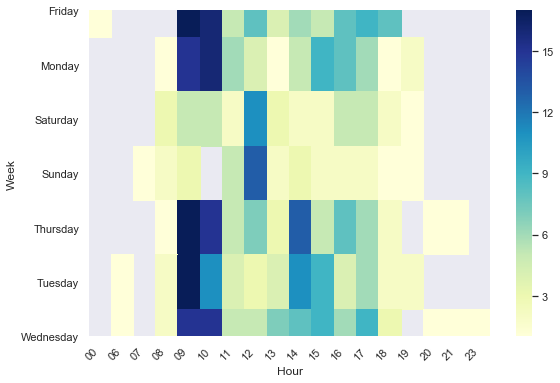

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

flights = df_post_blue.pivot("Week", "Hour", "count")
# 畫出x-y-z的圖，比如 年-月-銷量 的熱圖
f, ax = plt.subplots(figsize=(9, 6))
#使用不同的顏色
sns.heatmap(flights, fmt="d",cmap='YlGnBu', ax=ax)
#設置座標字體方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

## Your turn！
。請問總體來看，最熱門的發文時段是哪時候？

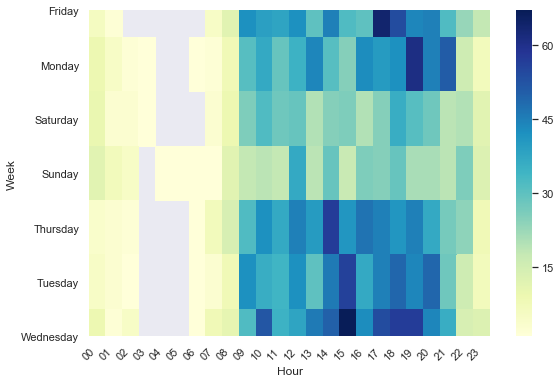

In [36]:
df_post_all = df.groupby(['Week','Hour'])['LIKE_COUNT'].count().reset_index(name='count')

flights = df_post_all.pivot("Week", "Hour", "count")
# 畫出x-y-z的圖，比如 年-月-銷量 的熱圖
f, ax = plt.subplots(figsize=(9, 6))
#使用不同的顏色
sns.heatmap(flights, fmt="d",cmap='YlGnBu', ax=ax)
#設置座標字體方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

## 觀察
> 觀察總體發文熱度圖可發現，各政黨的熱門發文時間
> 以周間的星期二三四為主，且多集中在中午過後至晚間八點以前，且星期一與周末則較少發文。
> 推測應該是因粉專小編周末排班較少，且星期一發文較少人關注的關係。
> 列出的熱門時間，可當作觀察特定粉專發文活動的依據。

+ 星期一晚上七點到九點
+ 星期二下午三點
+ 星期三中午十點、下午三點到八點之間
+ 星期四下午兩點
+ 星期五下午五點

## 延伸探討
1.找出前10名讚數最高的文章，探討其關鍵內容  
2.找出最高聲量的月份，探討最多人回應的內文，情緒指數為何  
3.找出某熱門政黨發文的活躍時間，與成效不彰的其他政黨粉專做差異比較

In [37]:
df_post_all.head()

,Week,Hour,count
0,Friday,00,6
1,Friday,01,2
2,Friday,07,5
3,Friday,08,12
4,Friday,09,42


In [38]:
df.head()

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,...,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,Post_Date,Hour,Week
0,2020-01-11 20:07:46,台灣基進,348571125292077,NaN,photo,80928,74991,98,3847,1925,...,33,5732,4092,選舉過後，台灣基進不會停歇。\n \n縱使韓國瑜沒有當選，他仍然在高雄破壞著我們的城市，仍會...,NaN,NaN,1578744466000,2020-01-11,20,Saturday
1,2020-01-10 23:34:57,台灣基進,348571125292077,NaN,video,56563,54562,18,1680,264,...,36,483,614,謝謝吳念真支持陳柏惟❤️！,NaN,NaN,1578670497000,2020-01-10,23,Friday
2,2020-01-12 01:46:20,台灣基進,348571125292077,NaN,photo,54640,51130,13,3358,31,...,5,1867,669,【 3Q 陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，...,NaN,NaN,1578764780000,2020-01-12,01,Sunday
3,2020-01-11 16:52:23,民主進步黨,150336441057,NaN,video,54703,45865,68,8065,464,...,196,28413,2212,《2020 台灣要贏 LET'S WIN 開票之夜》,2020.01.11 《2020 台灣要贏 LET'S WIN 開票之夜》,NaN,1578732743000,2020-01-11,16,Saturday
4,2020-01-08 20:35:23,台灣基進,348571125292077,NaN,video,42724,41209,42,1194,181,...,75,2027,1970,從台灣基進創立以來，高雄一直是我們最溫暖的家鄉。\n \n一路走來，我們從一個小木箱一隻麥克...,讓基進進國會｜陳柏惟,NaN,1578486923000,2020-01-08,20,Wednesday


In [39]:
df_blue['Post_Date'].head()

31    2019-12-21
100   2019-12-29
104   2019-12-09
156   2019-07-17
206   2019-12-22
Name: Post_Date, dtype: datetime64[ns]

In [40]:
df_blue_New = df_blue[['Post_Date', 'Message']]
df_blue_New = df_blue_New.dropna()
df_blue_New['Message']

31      今日挺韓「南方崛起高雄光榮周年慶大遊行」 下午1點11分準時出發\n全程我們都是秉持著理性且...
100     【元旦升旗，不見不散】\n\n你有多久沒有唱國歌、升國旗了？迎接明年元旦，我們一起升旗吧！國...
104     【支持總統候選人 2號韓國瑜】\n\n🇹🇼２隻穿雲箭，２號國政配🇹🇼\n🇹🇼韓國瑜當選，立法...
156     【初選過關，團結投藍】\n\n經過公平公正公開的民調作業，\n韓國瑜同志從總統初選中出線，\...
206     【力挺韓國瑜，上架中華民國派】\n\n相信昨天的「南方崛起高雄光榮週年慶」大遊行，仍然讓我們...
                              ...                        
3772                          #蔡英文總統執政3週年回顧\n【「碳氣」的台灣】記者會
3773    【15縣市公平對待！阿義哥有話要對中央政府說】\n大家好，吳主席今天下午在粉絲專頁跟大家分享...
3774                      主席在「周玉蔻嗆新聞」台北之音FM107.7 和大家在空中相見
3783    【年節時歲暖心報：清明 榖雨】\n清明穀雨、草木萌芽，逐漸暖和的天氣裡，偶爾會有來自東南方的...
3805    【空汙越來越嚴重，難道要用愛發電嗎？】\n\n「以核養綠」與「反燃煤電廠」公投雙雙過關，蔡英...
Name: Message, Length: 482, dtype: object

結巴斷詞 jieba

In [41]:
import jieba
from tqdm import tqdm

In [42]:
doc_names = range(len(df_blue_New))
text_list = list(df_blue_New['Message'])

In [43]:
df_blue_docs = pd.DataFrame(columns=['jieba_results'])

In [44]:
df_blue_docs['jieba_results'] = df_blue_docs['jieba_results'].astype('str')

In [45]:
df_blue_docs.head()

,jieba_results


In [46]:
for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)    
    print(text)
    print(i)
    s = pd.Series({'jieba_results': text})
    df_blue_docs = df_blue_docs.append(s, ignore_index=True)  

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\COCO\AppData\Local\Temp\jieba.cache
Loading model cost 1.974 seconds.
Prefix dict has been built succesfully.


 今日 挺韓 「 南方 崛起 高雄 光榮 周年 慶大遊行 」   下午 1 點 11 分準 時 出發 
 全程 我們 都 是 秉持 著 理性 且 支持 韓國瑜候 選人 的 態度 
 在 高雄 遊行 ， 訴諸 我們 人民 的 真實 聲音 
 不管 是 支持 又 或是 不 支持 ， 我們 都 是 在 訴諸 民主 
 我們 都 是 中華民國 的 國民 ！ 
 
 今日 我們 為 高雄 注入 了 全新 的 力量 ， 人潮 、 錢潮 ！ 
 
 # 明年 1 月 11 日 
 # 唯一 支持 2 號總統候 選人 韓國瑜 
 # 政黨票 9 號中國 國民黨 
 # 中國 國民黨 立委 候選人
0
 【 元旦 升旗 ， 不見 不散 】 
 
 你 有 多久 沒有 唱國歌 、 升國旗 了 ？ 迎接 明年 元旦 ， 我們 一起 升旗 吧 ！ 國民黨 主席 吳敦義 、 國民黨 副 總統候 選人 張善政 與 前 總統 馬 英九將 與 您 一起 迎接 光明 未來 ， 我們 不見 不散 ！ 
 
 ． 時間 ： 民國 109 年 1 月 1 日 上午 7 點 
 ． 地點 ： 國民黨 中央 黨部 （ 台北市 八德 路 二段 232 號戶 外 ）
1
 【 支持 總統候 選人   2 號韓國 瑜 】 
 
 🇹 🇼 ２ 隻 穿雲箭 ， ２ 號國政配 🇹 🇼 
 🇹 🇼 韓國瑜 當選 ， 立法院 過半 🇹 🇼 
 🇹 🇼 ２ ０ ２ ０ 年 ， 下架 蔡 英文 🇹 🇼 
 
 # 總統 支持 2 號國政配 
 # 立委 支持 國民黨 提名 候選人 
 # 政黨票 支持 中國 國民黨
2
 【 初選 過關 ， 團結 投藍 】 
 
 經過 公平 公正 公開 的 民調 作業 ， 
 韓國瑜 同志 從 總統 初選中 出線 ， 
 今天 正式 通過 了 中常 會 的 核備 ， 
 將會 提交 7 月 28 日 全代會 通過 。 
 
 面對 台灣 民主 被 蔡 英文 步步 侵蝕 ， 
 面對 中華民國 被民 進黨 借殼 上市 ， 
 我們 只有 團結 一心 ， 重返 執政 ， 
 才能 撥亂 反正 、 藍天 再現 ！
3
 【 力挺 韓國瑜 ， 上架 中華民國 派 】 
 
 相信 昨天 的 「 南方 崛起 高雄 光榮 週年慶 」 大遊行 ， 仍然 讓 我們 印象 深刻 ！ 飄揚 的 國旗 與 擠 爆 

In [47]:
df_blue_docs

,jieba_results
0,今日 挺韓 「 南方 崛起 高雄 光榮 周年 慶大遊行 」 下午 1 點 11 分準 ...
1,【 元旦 升旗 ， 不見 不散 】 \n \n 你 有 多久 沒有 唱國歌 、 升國旗 了...
2,【 支持 總統候 選人 2 號韓國 瑜 】 \n \n 🇹 🇼 ２ 隻 穿雲箭 ， ２...
3,【 初選 過關 ， 團結 投藍 】 \n \n 經過 公平 公正 公開 的 民調 作業 ，...
4,【 力挺 韓國瑜 ， 上架 中華民國 派 】 \n \n 相信 昨天 的 「 南方 崛起 ...
...,...
477,# 蔡 英文 總統 執政 3 週年 回顧 \n 【 「 碳氣 」 的 台灣 】 記者 會
478,【 15 縣市 公平 對待 ！ 阿義哥 有 話 要 對 中央政府 說 】 \n 大家 好 ...
479,主席 在 「 周玉蔻 嗆 新聞 」 台北 之音 FM107.7 和 大家 在 空中 相見
480,【 年節 時歲 暖 心報 ： 清明 榖 雨 】 \n 清明 穀 雨 、 草木 萌芽 ，...


In [48]:
text_list[6]

'#LIVE 中國國民黨元旦活動'

In [49]:
df_blue_New['jieba_results'] = df_blue_docs

In [50]:
df_blue_New['df_class'] = 'blue'

In [51]:
df_blue_New.head()

,Post_Date,Message,jieba_results,df_class
31,2019-12-21,今日挺韓「南方崛起高雄光榮周年慶大遊行」 下午1點11分準時出發\n全程我們都是秉持著理性且...,【 LIVE 】 韓國瑜 競選辦 公室 「 政見會 蔡總統 膨風 的 經濟 數字 釋疑 」...,blue
100,2019-12-29,【元旦升旗，不見不散】\n\n你有多久沒有唱國歌、升國旗了？迎接明年元旦，我們一起升旗吧！國...,【 LIVE 】 「 左手 台灣 掏錢 、 右手 『 錢 進大陸 』 綠皮 紅骨 ...,blue
104,2019-12-09,【支持總統候選人 2號韓國瑜】\n\n🇹🇼２隻穿雲箭，２號國政配🇹🇼\n🇹🇼韓國瑜當選，立法...,【 族繁 不及 備載 ！ 蔡 英文 失言 錄 】 \n \n 蔡 英文 總統 之前 才 要...,blue
156,2019-07-17,【初選過關，團結投藍】\n\n經過公平公正公開的民調作業，\n韓國瑜同志從總統初選中出線，\...,【 台商 回 台 逼近 7000 億 ？ 滿口 謊言 蔡 英文 】 \n \n 蔡 英文 ...,blue
206,2019-12-22,【力挺韓國瑜，上架中華民國派】\n\n相信昨天的「南方崛起高雄光榮週年慶」大遊行，仍然讓我們...,此時 此刻 ， 我們 在 東京 ！ \n 謝長 廷 出來面 對 ！ 辭職 負責 ！,blue


In [52]:
#選出民進黨的發文
df_green = df[df['Page_Name']=='民主進步黨']

df_green_New = df_green[['Post_Date', 'Message']]
df_green_New = df_green_New.dropna()
df_green_New['Message']

doc_names = range(len(df_green_New))
text_list = list(df_green_New['Message'])
df_green_docs = pd.DataFrame(columns=['jieba_results'])
df_green_docs['jieba_results'] = df_green_docs['jieba_results'].astype('str')

for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)    
    s = pd.Series({'jieba_results': text})
    df_green_docs = df_green_docs.append(s, ignore_index=True)  
    
df_green_New['jieba_results'] = df_green_docs
df_green_New['df_class'] = 'green'
df_green_New.head()


,Post_Date,Message,jieba_results,df_class
3,2020-01-11,《2020 台灣要贏 LET'S WIN 開票之夜》,🔥 蔡 英文 賴清德 # 光 復 高雄 選前 之夜 🔥 \n \n 2020 ...,green
10,2020-01-10,總統票3號蔡英文、賴清德，立委票請支持民主進步黨提名或推薦的候選人，第三張政黨票最重要，請集...,📣 活動 開始 了 ， 快來 加入 我們 吧 📣 \n \n 活動 開始 了 ， 現場 人...,green
11,2020-01-07,#這是我的投票意志\n\n總統票3號、政黨票14號，\n3.14是圓周率，守護民主需要投票率...,「 我要 感謝 您 不曾 放棄 我們 共同 打 拚 的 民主 ， 感謝 您 不曾 放棄 我...,green
14,2020-01-10,🔥蔡英文賴清德 #光復高雄 選前之夜🔥\n\n2020 高雄大贏！2020 台灣要贏！\n高...,從 今年 9 月 28 日黨慶 推出 以來 ， 民進 黨詢 問度 破表 的 飛行 夾克終 ...,green
19,2020-01-05,1月11日，我們一起回家投票！\n\n這一天的你，早起搭上返鄉的列車，檢查身份證是否帶上，我...,「 顧主權 ！ 拚經濟 ！ 會 做事 ！ 」 \n \n 這幾個 字 不是 口號 \n 是...,green


In [53]:
#選出台灣民眾黨的發文
df_white = df[df['Page_Name']=='台灣民眾黨']

df_white_New = df_white[['Post_Date', 'Message']]
df_white_New = df_white_New.dropna()
df_white_New['Message']

doc_names = range(len(df_white_New))
text_list = list(df_white_New['Message'])
df_white_docs = pd.DataFrame(columns=['jieba_results'])
df_white_docs['jieba_results'] = df_white_docs['jieba_results'].astype('str')

for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)    
    s = pd.Series({'jieba_results': text})
    df_white_docs = df_white_docs.append(s, ignore_index=True)  
    
df_white_New['jieba_results'] = df_white_docs
df_white_New['df_class'] = 'white'
df_white_New.head()

,Post_Date,Message,jieba_results,df_class
37,2020-01-11,"【是你們，推動了這場寧靜革命】\n \n \n台灣民眾黨於本次大選中，共獲得1,588,...",【 尊重 專業 ， 堅持 程序 正義 】 \n \n \n 大 巨蛋 的 ...,white
58,2020-01-30,黨徽上線囉～～～大家覺得如何呢！,【 嚴正 聲明 】 \n \n 大選 在 即 ， 專欄 作家 姚清峰 於 「 新頭...,white
154,2020-01-13,【民眾黨黨團總召/副總召出爐──賴香伶、張其祿擔綱】\n \n \n台灣民眾黨在2020...,【 台灣民眾 黨 形象 視覺識 別系統 徵集 辦法 】 \n  \n \...,white
173,2020-01-15,台灣民眾黨，以台灣為名，以民眾為本。看到台北市以台灣台北的名稱，與布拉格市締結姊妹市，讓台灣...,【 羅 鼎城 ─ ─ 關鍵 少數 ， 專業 服務 】 \n \n \n 擔...,white
224,2019-11-19,【台灣民眾黨不分區立委名單】\n \n \n我們相信，眾人的智慧，會超越個人的智慧。\...,【 野生 主席 與候 選人出 沒 指南 - 11 / 23 】 \n \n ...,white


In [54]:
#合併dataframe
mergeData = df_white_New.append(df_green_New)
mergeData = mergeData.dropna() #刪除有NAN值的data
mergeData

,Post_Date,Message,jieba_results,df_class
37,2020-01-11,"【是你們，推動了這場寧靜革命】\n \n \n台灣民眾黨於本次大選中，共獲得1,588,...",【 尊重 專業 ， 堅持 程序 正義 】 \n \n \n 大 巨蛋 的 ...,white
58,2020-01-30,黨徽上線囉～～～大家覺得如何呢！,【 嚴正 聲明 】 \n \n 大選 在 即 ， 專欄 作家 姚清峰 於 「 新頭...,white
154,2020-01-13,【民眾黨黨團總召/副總召出爐──賴香伶、張其祿擔綱】\n \n \n台灣民眾黨在2020...,【 台灣民眾 黨 形象 視覺識 別系統 徵集 辦法 】 \n  \n \...,white
173,2020-01-15,台灣民眾黨，以台灣為名，以民眾為本。看到台北市以台灣台北的名稱，與布拉格市締結姊妹市，讓台灣...,【 羅 鼎城 ─ ─ 關鍵 少數 ， 專業 服務 】 \n \n \n 擔...,white
224,2019-11-19,【台灣民眾黨不分區立委名單】\n \n \n我們相信，眾人的智慧，會超越個人的智慧。\...,【 野生 主席 與候 選人出 沒 指南 - 11 / 23 】 \n \n ...,white
...,...,...,...,...
836,2019-11-03,｜嚴正譴責韓粉抹黑記者 選舉不應靠造謠搏關注｜\n\n蔡英文 Tsai Ing-wen總統出...,波痞 到底 是 在 幹 嘛 ？ x 戴瑋姍 · 板橋 x 李晏榕 Ye...,green
837,2019-11-14,今天，民主進步黨非常榮幸能邀請社民黨創黨召集人范雲，擔任本黨第十屆不分區委員提名人。\n\n...,民主 進步 黨 第十六 屆 黨 主席 補選政見 發表會 \n \n 第一 場 ： 20...,green
839,2020-01-10,現在時間 3:14 \n一起 #做小英的後盾 ‼️\n \n▶️換上臉書大頭貼，使用③・...,【 Women 的 會 客室 】 第三季 第三集 節目 預告 \n \n 🗣 仇女...,green
840,2019-10-23,你知道嗎？蔡政府執政，每四天就有三天收盤股市上萬點。而昨天的台股加權指數，更創下29年新高！...,🚀 🚀 福衛七號 發射 直播 倒數 中 ❗ ️ 14 : 00 開播 ‼ ️ \n...,green


In [55]:
corpus = mergeData['jieba_results'].values.tolist()

In [56]:
# TF-IDF
# coding:utf-8  
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [57]:
len(corpus)
features = tfidf.toarray()
labels = mergeData['Post_Date'].values
labels

array(['2020-01-11T00:00:00.000000000', '2020-01-30T00:00:00.000000000',
       '2020-01-13T00:00:00.000000000', '2020-01-15T00:00:00.000000000',
       '2019-11-19T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-23T00:00:00.000000000', '2020-01-30T00:00:00.000000000',
       '2019-08-06T00:00:00.000000000', '2020-01-11T00:00:00.000000000',
       '2020-01-22T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2019-11-12T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2019-12-29T00:00:00.000000000',
       '2020-01-10T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2019-12-10T00:00:00.000000000', '2020-01-06

In [58]:
# PCA
from pandas import DataFrame, read_csv
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
mergeData['pca1'] = DataFrame(transData[:,0])
mergeData['pca2'] = DataFrame(transData[:,1])
mergeData.head()

,Post_Date,Message,jieba_results,df_class,pca1,pca2
37,2020-01-11,"【是你們，推動了這場寧靜革命】\n \n \n台灣民眾黨於本次大選中，共獲得1,588,...",【 尊重 專業 ， 堅持 程序 正義 】 \n \n \n 大 巨蛋 的 ...,white,-0.109573,-0.112481
58,2020-01-30,黨徽上線囉～～～大家覺得如何呢！,【 嚴正 聲明 】 \n \n 大選 在 即 ， 專欄 作家 姚清峰 於 「 新頭...,white,-0.107975,-0.104822
154,2020-01-13,【民眾黨黨團總召/副總召出爐──賴香伶、張其祿擔綱】\n \n \n台灣民眾黨在2020...,【 台灣民眾 黨 形象 視覺識 別系統 徵集 辦法 】 \n  \n \...,white,-0.034735,-0.112970
173,2020-01-15,台灣民眾黨，以台灣為名，以民眾為本。看到台北市以台灣台北的名稱，與布拉格市締結姊妹市，讓台灣...,【 羅 鼎城 ─ ─ 關鍵 少數 ， 專業 服務 】 \n \n \n 擔...,white,-0.027649,-0.006205
224,2019-11-19,【台灣民眾黨不分區立委名單】\n \n \n我們相信，眾人的智慧，會超越個人的智慧。\...,【 野生 主席 與候 選人出 沒 指南 - 11 / 23 】 \n \n ...,white,-0.036616,0.004510


C:\Users\COCO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


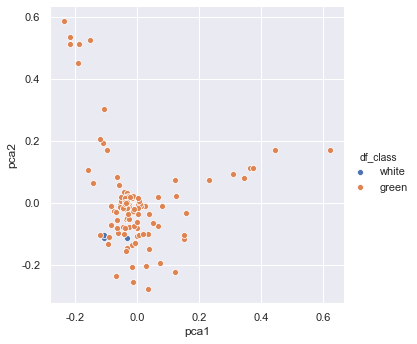

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=mergeData, hue="df_class", size=5)

In [60]:
textFrame = pd.DataFrame(features, columns = word)
textFrame

,00,01,0127,016,03,0316,039,0427,08,0800,...,鼓起,鼓道場,齊喊,齊心,龍井,龍崎,龍潭,龐克,龐大,龜山
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.239900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,0.213886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,0.069346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [62]:
allF[np.nonzero(allF)]

array([0.02256527, 0.04362975, 0.02361339, ..., 0.30051105, 0.18625256,
       0.38996458])

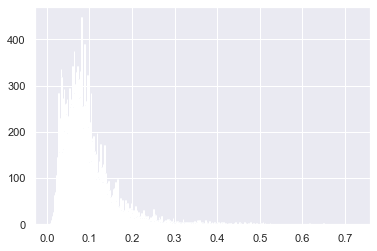

0.0821175911903115

In [63]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [64]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[tuple([textFrame.iloc[i] >= m])]  #有tuple error
    dataset.append(temp.tolist())

In [65]:
for i in range(len(features)):
    print(dataset[i])

['實際', '審查', '審議', '專業', '巨蛋', '市府', '情境', '方式', '正義', '程序', '設計', '通過', '都市', '防火', '防災']
['newtalk', '下標', '不符', '並將', '之告訴', '之言論', '之選舉', '事實', '作家', '價值', '名譽', '國會', '大亂', '妨礙', '姚清峰', '實資訊', '專欄', '導正', '希冀', '引導大眾', '形態', '意圖', '意識', '戮力', '投書', '抗議', '挑起', '捍衛本', '撰文', '擺脫', '新頭', '本黨', '束縛', '歪風', '藉此', '藍白過', '表達']
['中英文', '主辦', '作品', '公開', '台灣民眾', '圍者', '徵集', '應用', '打字', '標準', '標誌', '獎金', '理念', '發想', '組合', '聯絡', '色彩', '設計', '評審', '輔助']
['低收入', '各區', '困境', '少數', '幫助', '弱勢', '撤銷', '標準', '民眾', '自己', '認定', '財政', '農業', '高雄', '高雄市', '鼎城']
['00', '09', '10', '23', '83', 'with', '中山路', '六甲', '地址', '左營區', '新營區', '耀星', '與候', '莊貽量', '高雄', '高雄市', '鼎城']
['15', '做主', '再換', '出借', '十五', '只能', '台灣民眾', '大頭', '太多', '官方', '廣告', '政黨票', '框不夠', '框換', '民眾', '版面', '特效', '第二', '號台灣民眾', '親朋', '貼當', '資源', '踴躍', '身旁', '選戰僅']
['15', '22', 'day', '做主', '分享', '南門', '反顧', '台北', '台大', '向前走', '市場', '拜票', '民眾', '留言', '直播', '眾走', '行程']
['15', '20', 'day', '信義市場', '做主', '分享', '反顧', '台大', '向前走', '基隆', '安媒體', '拜票

In [66]:
# Apriori: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = mergeData['Post_Date']

In [67]:
graph.tail()

Post_Date,2020-01-11,2020-01-30,2020-01-13,2020-01-15,2019-11-19,2020-01-10,2020-01-23,2020-01-30,2019-08-06,2020-01-11,...,2019-08-12,2019-12-28,2019-10-25,2019-09-16,2019-12-16,2019-11-03,2019-11-14,2020-01-10,2019-10-23,2019-09-24
鼓吹者,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
鼓山,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
鼓道場,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龍崎,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龐克,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minsup = 0.005
apriori(graph, min_support = minsup, use_colnames=True)

,support,itemsets
0,0.008345,(2020-01-30 00:00:00)
1,0.005638,(2020-01-10 00:00:00)
2,0.005638,(2019-08-06 00:00:00)
3,0.008345,(2020-01-11 00:00:00)
4,0.009247,(2020-01-10 00:00:00)
...,...,...
161,0.005187,"(2019-12-28 00:00:00, 2020-01-05 00:00:00)"
162,0.005638,"(2019-12-28 00:00:00, 2019-12-26 00:00:00)"
163,0.005638,"(2019-12-20 00:00:00, 2019-12-11 00:00:00)"
164,0.005864,"(2020-01-21 00:00:00, 2019-11-18 00:00:00)"


In [69]:
result = apriori(graph, min_support = minsup)
result

,support,itemsets
0,0.008345,(1)
1,0.005638,(5)
2,0.005638,(8)
3,0.008345,(12)
4,0.009247,(13)
...,...,...
161,0.005187,"(66, 115)"
162,0.005638,"(66, 167)"
163,0.005638,"(171, 134)"
164,0.005864,"(283, 147)"


In [70]:
rules = association_rules(result, metric="confidence", min_threshold=0.0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(105),(50),0.009021,0.009021,0.009021,1.000000,110.850000,0.008940,inf
1,(50),(105),0.009021,0.009021,0.009021,1.000000,110.850000,0.008940,inf
2,(66),(115),0.011276,0.008570,0.005187,0.460000,53.674737,0.005091,1.835981
3,(115),(66),0.008570,0.011276,0.005187,0.605263,53.674737,0.005091,2.504766
4,(66),(167),0.011276,0.009923,0.005638,0.500000,50.386364,0.005526,1.980153


In [71]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(105),(50),0.009021,0.009021,0.009021,1.000000,110.850000,0.008940,inf
1,(50),(105),0.009021,0.009021,0.009021,1.000000,110.850000,0.008940,inf
2,(66),(115),0.011276,0.008570,0.005187,0.460000,53.674737,0.005091,1.835981
3,(115),(66),0.008570,0.011276,0.005187,0.605263,53.674737,0.005091,2.504766
4,(66),(167),0.011276,0.009923,0.005638,0.500000,50.386364,0.005526,1.980153


In [72]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(105),(50),0.009021,0.009021,0.009021,1.000000,110.850000,0.008940,inf,1
1,(50),(105),0.009021,0.009021,0.009021,1.000000,110.850000,0.008940,inf,1
2,(66),(115),0.011276,0.008570,0.005187,0.460000,53.674737,0.005091,1.835981,1
3,(115),(66),0.008570,0.011276,0.005187,0.605263,53.674737,0.005091,2.504766,1
4,(66),(167),0.011276,0.009923,0.005638,0.500000,50.386364,0.005526,1.980153,1


In [73]:
out = rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len


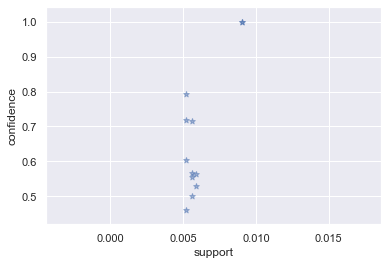

In [74]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [75]:
len(rules)
rules['antecedents'].head()

0    (105)
1     (50)
2     (66)
3    (115)
4     (66)
Name: antecedents, dtype: object

In [76]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(mergeData)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

NetworkXError: Node 321 has no position.

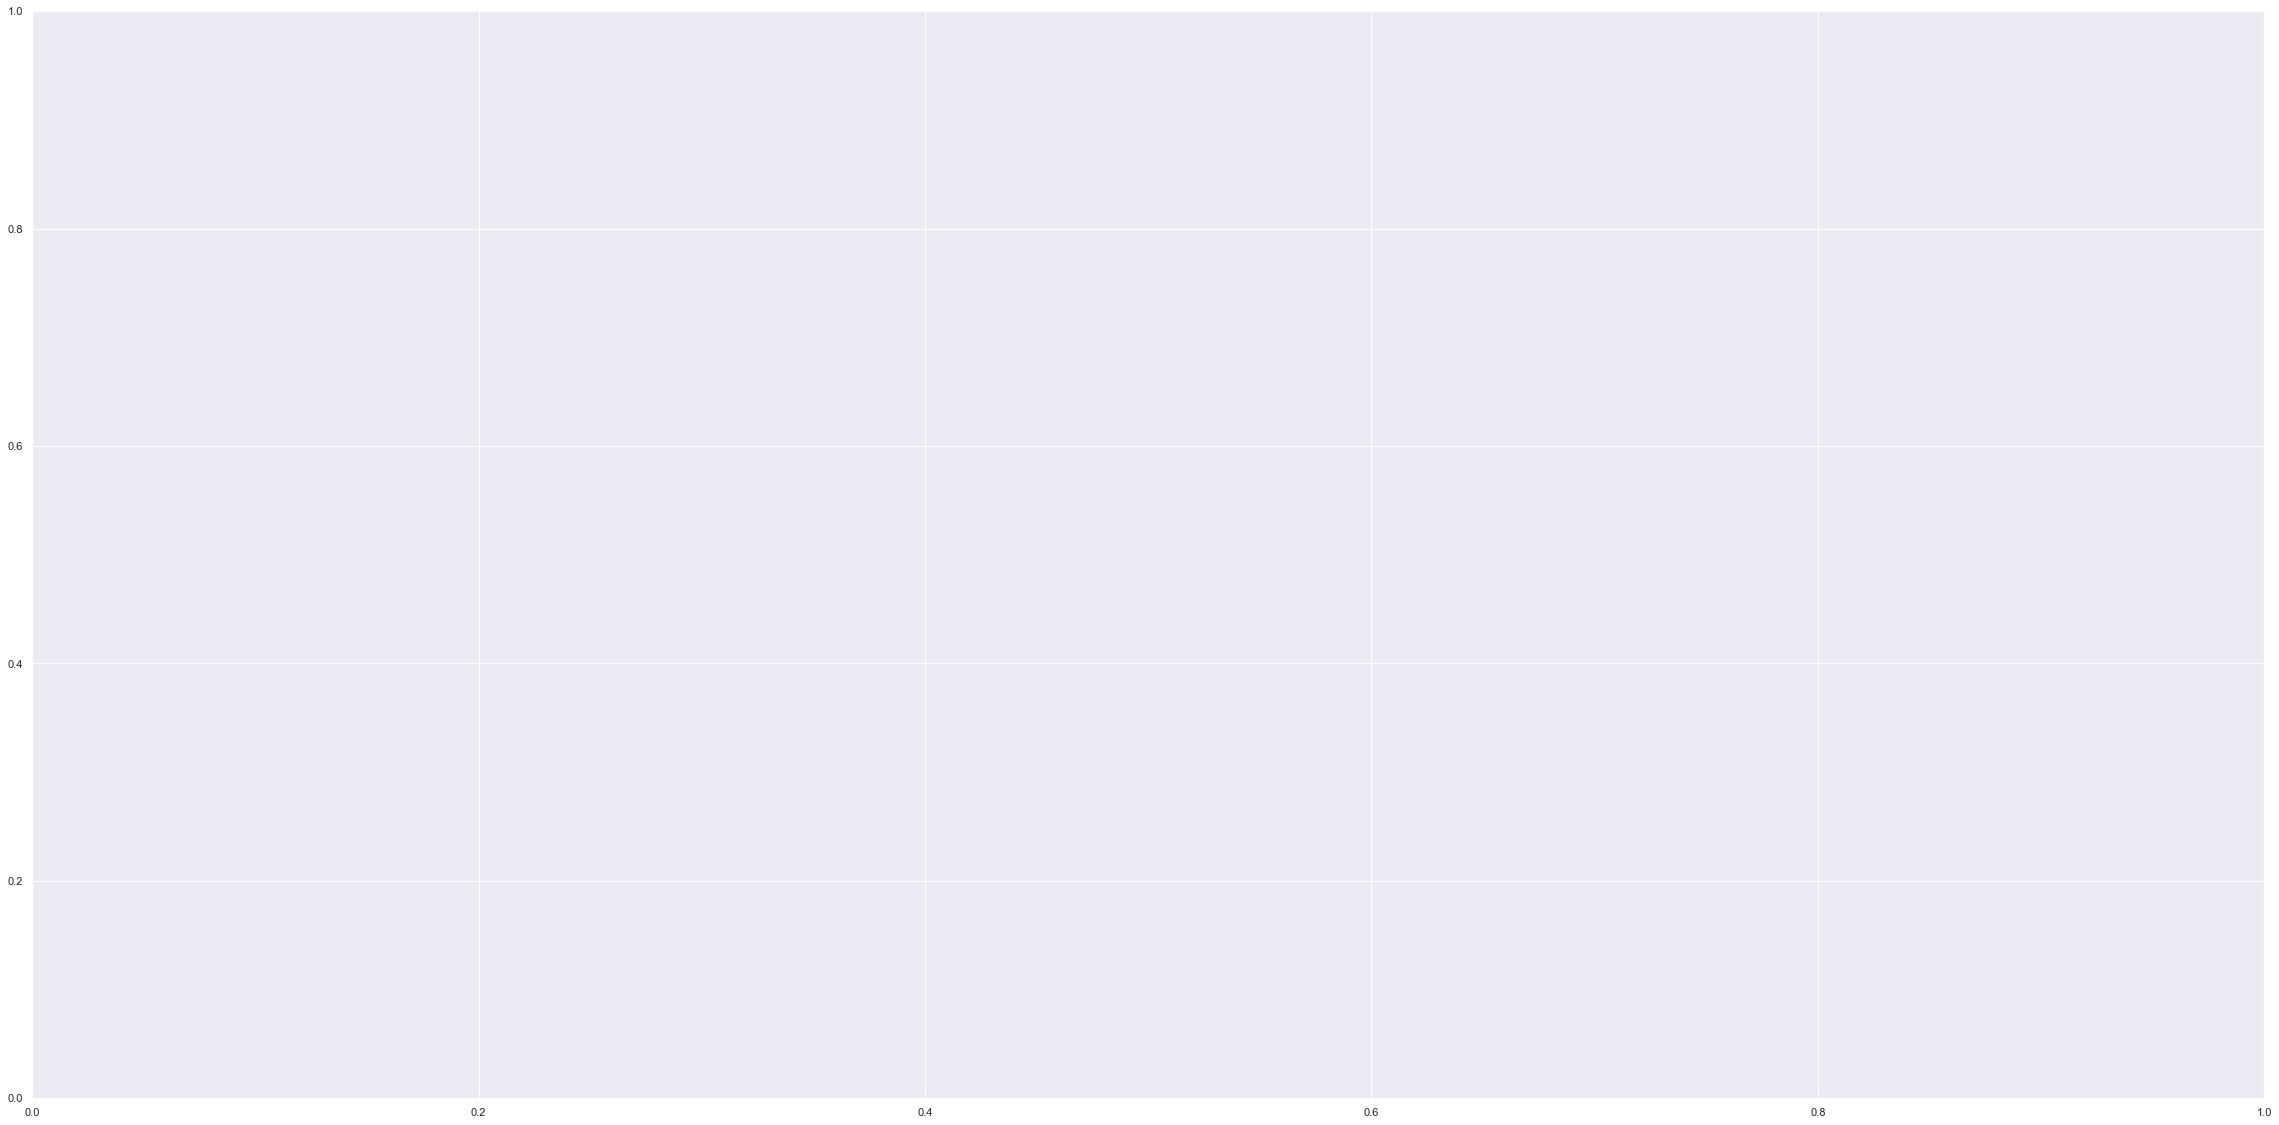

In [78]:
nodeListA = mergeData.index[mergeData['df_class'] == 'white'].tolist()
nodeListB = mergeData.index[mergeData['df_class'] == 'green'].tolist()
plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA, node_color="b", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="r", node_size=1000)

nx.draw_networkx_edges(G, pos, width=10)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display